In [1]:
%matplotlib inline


# 1D Unbalanced optimal transport


This example illustrates the computation of Unbalanced Optimal transport
using a Kullback-Leibler relaxation.



In [2]:
# Author: Hicham Janati <hicham.janati@inria.fr>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

Generate data
-------------



In [3]:
n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
b = gauss(n, m=60, s=10)

# make distributions unbalanced
b *= 5.

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

Plot distributions and loss matrix
----------------------------------



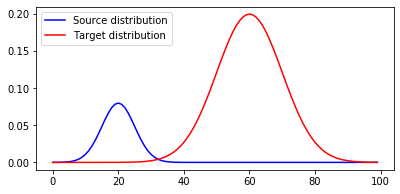

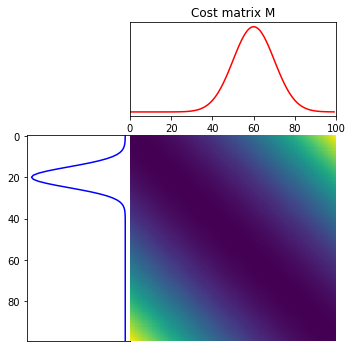

In [4]:
pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

# plot distributions and loss matrix

pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, 'Cost matrix M')

Solve Unbalanced Sinkhorn
--------------



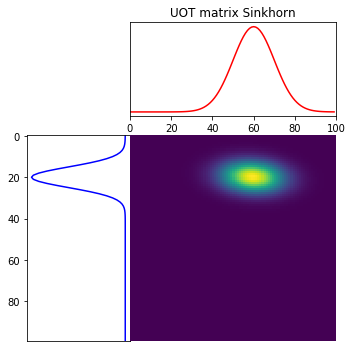

In [5]:
# Sinkhorn

epsilon = 0.1  # entropy parameter
alpha = 1.  # Unbalanced KL relaxation parameter
Gs = ot.unbalanced.sinkhorn_unbalanced(a, b, M, epsilon, alpha, verbose=True)

pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'UOT matrix Sinkhorn')

pl.show()